In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)
#строчка нужна, чтобы датасеты с множеством колонок отображались полностью
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Линейная регрессия: эксперимент на искусственных данных (4 балла)

Сгенерируем искусственные данные. Каждый объект имеет один признак, который записан в переменную $X$. Целевая переменная $y$ зависит от $X$ по закону $y = 7X - 10$. Поскольку восстанавливать в точности линейную зависимость не интересно, к целевой переменной добавлен шум, имеющий нормальное распределение. Ниже визуализировано распределение шума.

(array([1., 1., 1., 4., 2., 4., 0., 3., 2., 2.]),
 array([-16.8528637 , -13.26798706,  -9.68311042,  -6.09823378,
         -2.51335715,   1.07151949,   4.65639613,   8.24127277,
         11.82614941,  15.41102605,  18.99590269]),
 <a list of 10 Patch objects>)

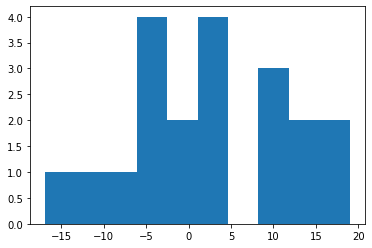

In [2]:
noise = np.random.randn(20) * 10
plt.hist(noise)

In [8]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7 + noise

X = X.reshape(-1,1) 
X
# Изменение формы необходимо, поскольку на вход линейной регрессии 
# должна подаваться двумерная матрица, а не вектор
X.shape

(20, 1)

### Задание 1 (0 баллов)
Разбейте данные на train и test в соотношении 1:1. Используйте функцию ``sklearn.model_selection.train_test_split``.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Визуализируем данные, используя библиотеку matplotlib.

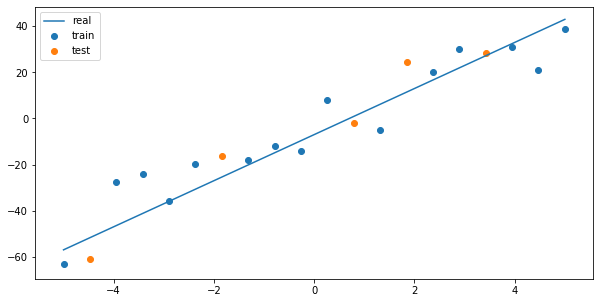

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

### Задание 2 (2 балла)
Обучите модель линейной регрессии на тренировочной выборке и предскажите значения на тестовой.
Предсказанные ответы сохраните в переменную ``predictions``, а веса модели (угол наклона прямой и свободный член) --- в переменные ``w``, ``b``. О том, где внутри модели сохраняются веса, можно прочесть в <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>документации</a>.

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()
model.fit(<YOUR CODE>)

predictions = <YOUR CODE>

w = <YOUR CODE>
b = <YOUR CODE>

In [0]:
w, b

Визуализируем предсказания.

In [0]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, X * w + b, label='predicted')
plt.legend()
plt.show()

### Задание 3 (1 балл)
Вычислите среднеквадратичную и среднюю абсолютную ошибку на обучающем и тестовом множествах.

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_predicted = <YOUR CODE>
y_test_predicted = <YOUR CODE>

print('Train MSE: ', <YOUR CODE>)
print('Test MSE: ', <YOUR CODE>)

In [0]:
print('Train MAE: ', <YOUR CODE>)
print('Test MAE: ', <YOUR CODE>)

### Задание 4 (1 балл)
Сделайте выводы. Верно ли, что ошибка на train меньше, чем на test? В связи с чем это происходит?

# Предсказание отклика на маркетинговую кампанию банка с помощью логистической регрессии (6 баллов)

В этом разделе вы решите задачу предсказания отклика на маркетинговую кампанию с помощью логистической регрессии. 

## Постановка задачи
Для нового продукта банка необходимо определить круг клиентов, которым будет совершён телефонный звонок с предложением продукта. Известно, что один звонок независимо от результата стоит 10 рублей, а каждый успешный звонок приносит банку 100 рублей. Цель -- максимизировать прибыль банка. 

Мы имеем задачу классификации клиентов на два класса. Для каждого клиента будем предсказывать вероятность отклика на кампанию, а затем выберем пороговую вероятность обзвона. Предсказывать вероятность предлагается с помощью логистической регрессии.

## Сбор данных
В вашем распоряжении есть выборка из предыдущих звонков, для каждого из которых имеется вектор признаков (характеристики клиента и продукта), а также результат звонка. Загрузим данные с помощью библиотеки Pandas. Создадим объект ``data`` класса ``pandas.DataFrame``.

Описание данных: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [0]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
# Если строчка не выполняется, ноутбук нужно сохранить на 
# компьютере и данные положить в ту же папку

Взглянем на выборку, соберём предварительную информацию о ней, изучим признаки с помощью функций ``head``, ``info``, ``describe`` библиотеки Pandas.

In [0]:
data.head()

In [0]:
data.info()

In [0]:
data.describe()

### Задание 5 (1 балл)
Сейчас целевая переменная записана в ``data['y']`` и имеет текстовый вид ("yes" или "no"). Переведите её в числовой вид. Вам поможет класс ``LabelBinarizer`` модуля ``sklearn.preproccesing``. Модуль содержит классы для предобработки признаков.

Выделите целевое значение в переменную ``y``.

In [0]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()

y = <YOUR CODE>

data['y'] = y

data.describe()

In [0]:
data['y'].value_counts()

Видим, что классы очень несбалансированы. 

## Предварительный анализ признаков
В датасете есть признак ``duration``, обозначающий длительность совершённого звонка. Это значение неизвестно до совершения звонка, поэтому не может быть использовано для предсказания. Удалим эту переменную из рассмотрения. Сделаем это с помощью метода ``drop`` класса ``pandas.DataFrame``.

In [0]:
data = data.drop(columns=['duration'])

В датасете многие признаки являются категориальными. Мы ограничимся их one-hot кодированием. 

## One-hot кодирование
One-hot кодирование категориального признака ``feature``, принимающего $k$ значений ``1``, ``2``, ``3``, $\ldots$, ``t``, заключается в создании $t$ новых бинарных признаков ``"feature == 1"``, ``"feature == 2"``, $\ldots$, ``"feature == t"``, определяющихся по формуле

$$\text{"feature == i"} = 
\begin{cases}
1,& feature = i\\
0,& feature \neq i
\end{cases}.$$


### Задание 6 (1 балл)
Закодируйте категориальные признаки. One-hot encoding с помощью Pandas можно выполнить с помощью функции ``get_dummies``. 


In [0]:
# Разделим признаки на числовые и категориальные с помощью функции ``select_dtypes``

data_categorical = data.select_dtypes(include=['object'])
data_numeric = data.select_dtypes(exclude=['object'])

data_one_hot = <YOUR CODE>

### Визуализация данных
Визуализация данных полезна для предварительного анализа. Подробно о визуализации мы поговорим на следующих занятиях, а сейчас ограничимся построением матрицы корреляций по числовым признакам. Нам пригодится функция ``heatmap`` библиотеки Seaborn, а также функция ``corr`` класса ``pandas.DataFrame``.

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(data_numeric.corr())

## Составление плана обучения и тестирования, train и test

Прежде чем производить обработку признаков, необходимо составить план обучения и тестирования. Чтобы смоделировать "реальную" производственную ситуацию и избежать переобучения, необходимо разделить данные на train и test. Выборка test **будет недоступна** на стадии обработки признаков и обучения. Строго говоря, выделение категориальных признаков также необхоимо было проводить после разбиения, но для простоты мы опустим этот момент. Также не забудем выбросить целевую переменную из ``data_numeric``.

Разобьём данные на train и test в соотношении 70:30 с помощью функции ``train_test_split`` модуля ``sklearn.model_selection``.

In [0]:
data_numeric = data_numeric.drop(columns=['y'])

from sklearn.model_selection import train_test_split

data_train, data_test, data_categorical_train, data_categorical_test,\
data_one_hot_train, data_one_hot_test,\
data_numeric_train, data_numeric_test, y_train, y_test\
= train_test_split(data, data_categorical, data_one_hot, data_numeric, y)

### Обработка числовых признаков, нормировка
Есть множество методов обработки, генерации новых признаков, отбора признаков и т.д. Многие из них реализованы в модулях ``sklearn.preprocessing`` и ``sklearn.feature_selection``. Сейчас мы ограничимся нормировкой признаков. 

Нормировка признаков производится по формуле 
$$x \rightarrow \frac{x - a}{\sigma},$$
где $a$ -- среднее значение признака, а $\sigma$ -- среднее квадратическое отклонение признака, вычисляемое по формуле $$\sigma = \sqrt{\frac{(x_1 - a)^2 + \ldots + (x_n - a)^2}{n}}.$$



### Задание 7 (1 балл)
Произведите нормировку обучающих данных. Вам поможет класс ``StandartScaler`` модуля ``sklearn.preprocessing``. Нужно быть осторожным: StandartScaler выводит нас за рамки pandas. Результат применения -- ``numpy.ndarray``.

Необходимо нормировать только числовые данные: data_numeric_train.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_normalized_train = <YOUR CODE>

## Формирование матрицы объекты-признаки
После выполнения всех предыдущих действий мы наконец готовы сформировать матрицу объекты-признаки из всех данных, которые нам доступны. Сольём категориальные и числовые признаки, сформировав тренировочную матрицу объекты-признаки.

In [0]:
X_train = np.concatenate([data_normalized_train, data_one_hot_train], axis=1)

In [0]:
X_train.shape

## Обучение алгоритма

### Задание 8 (1 балл)
Создайте и обучите логистическую регрессию. Нужный вам класс ``LogisticRegression`` находится в модуле ``sklearn.linear_model``.
Предскажите вероятности принадлежности объектов обучающей выборки к классу 1. Используйте метод модели ``predict_proba``.

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [0]:
<YOUR CODE>

y_train_predicted_probs = <YOUR CODE>

## Тестирование модели

После обучения модели необходимо протестировать её и посчитать необходимые метрики. Для этого вспомним про тестовую выборку. 
### Задание 9 (1 балл)
Примените к тестовой выборке те же преобразования, что и к обучающей. В нашем случае это нормировка, конкатенация и предсказание вероятностей. Обратите внимание, что параметры нормировки сохранены в объекте ``scaler``.

In [0]:
data_normalized_test = <YOUR CODE>
X_test = <YOUR CODE>

y_test_predicted_probs = <YOUR CODE>

Теперь, когда мы нашли вероятности отклика, можем выбрать порог вероятности обзвона (скажем, 0.5). Построим для обучающей и тестовой выборок ROC-кривые и посчитаем значения метрик. Нам поможет модуль ``sklearn.metrics`` и его функции ``accuracy_score``, ``precision_score``, ``recall_score``, ``roc_auc_score``, ``roc_curve``. 
Напишем функцию для вычисления метрик и построения графиков.

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

def print_metrics(y_true, y_predicted_probs, threshold_probability = 0.5, names = ['train', 'test']):
    plt.figure(figsize=(10,6))
    for y_true_, y_predicted_probs_, name in zip(y_true, y_predicted_probs, names):
        plt.plot(*(roc_curve(y_true_, y_predicted_probs_)[0:2]), label=name + ' ROC-curve')
        print(name + ' accuracy: ', accuracy_score(y_true_, y_predicted_probs_ > threshold_probability))
        print(name + ' precision: ', precision_score(y_true_, y_predicted_probs_ > threshold_probability))
        print(name + ' recall: ', recall_score(y_true_, y_predicted_probs_ > threshold_probability))
        print(name + ' ROC-AUC: ', roc_auc_score(y_true_, y_predicted_probs_))
    plt.plot([0, 1], [0, 1], '--', color='black',)
    plt.grid(True)
    plt.legend()
    plt.show()

In [0]:
print_metrics([y_train, y_test], [y_train_predicted_probs, y_test_predicted_probs],
              0.5, names = ['train', 'test'])

## Бонусное задание: интерпретация результатов (1 балл)
Интерпретируйте полученные результаты. Найдите оптимальный порог вероятности обзвона для максимизации прибыли, если каждый звонок стоит 10 рублей, а каждый успешный звонок приносит 100 рублей. Вам понадобится функция ``numpy.argmax`` и уже известная функция ``roc_curve``. Определите удельную прибыль на человека на тестовом множестве. Пожалуйста, оформите результат в легко читаемом виде и сделайте вывод.

Информацию про ROC-кривую вы можете найти на <a href=https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F> странице в википедии</a>. Пример работы с sklearn.metrics.roc_curve можно найти в <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html>документации к методу</a>.

In [0]:
<YOUR CODE>

Ваши выводы